**Nama**: Az-Zukhrufu Fi Silmi Suwondo

**Surel**: afsilmis@gmail.com

#### **Objective**

Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.

#### **Tentang Organisasi**

HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam.

#### **Permasalahan**

HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

#### **Penjelasan Kolom Fitur**

- Negara: Nama negara
- Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
- Ekspor : Ekspor barang dan jasa perkapita
- Kesehatan: Total pengeluaran kesehatan perkapita
- Impor: Impor barang dan jasa perkapita
- Pendapatan: Penghasilan bersih perorang
- Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP
- Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
- Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
- GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi.

## **Impor Library dan Pengaturan**

In [ ]:
pip install dython

In [ ]:
'''
Mengimport libraries
'''

import pandas as pd
import numpy as np
from math import pi

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from sklearn.decomposition import PCA

import itertools
from dython.nominal import associations

In [ ]:
# Buat folder fonts
!mkdir -p /root/.fonts/

# Unduh Poppins Regular & Bold langsung ke folder
!wget -q https://github.com/google/fonts/raw/main/ofl/poppins/Poppins-Regular.ttf -P /root/.fonts/
!wget -q https://github.com/google/fonts/raw/main/ofl/poppins/Poppins-Bold.ttf -P /root/.fonts/

# Refresh font cache
!fc-cache -fv

# Tambahkan ke font manager matplotlib
import matplotlib.font_manager as fm
fm.fontManager.addfont('/root/.fonts/Poppins-Regular.ttf')
fm.fontManager.addfont('/root/.fonts/Poppins-Bold.ttf')

# Set default font ke Poppins
plt.rcParams['font.family'] = 'Poppins'

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: caching, new cache contents: 2 fonts, 0 dirs
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


## **Muat Data**

In [ ]:
'''
Membaca Data
'''

df = pd.read_csv("Data_Negara_HELP.csv")
display(df.head())

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
'''
Memeriksa Dimensi Data
'''

df.shape

(167, 10)

In [ ]:
'''
Memeriksa Informasi Data
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
'''
Memeriksa Deskripsi Statistik Data
'''

df.describe(include='all')

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


In [ ]:
'''
Data Numerikal
'''

data_numerik = df.select_dtypes(include=['int64', 'float64'])
data_numerik.head()

kolom_numerik = df.select_dtypes(include=np.number).columns

## **Exploratory Data Analysis (EDA)**

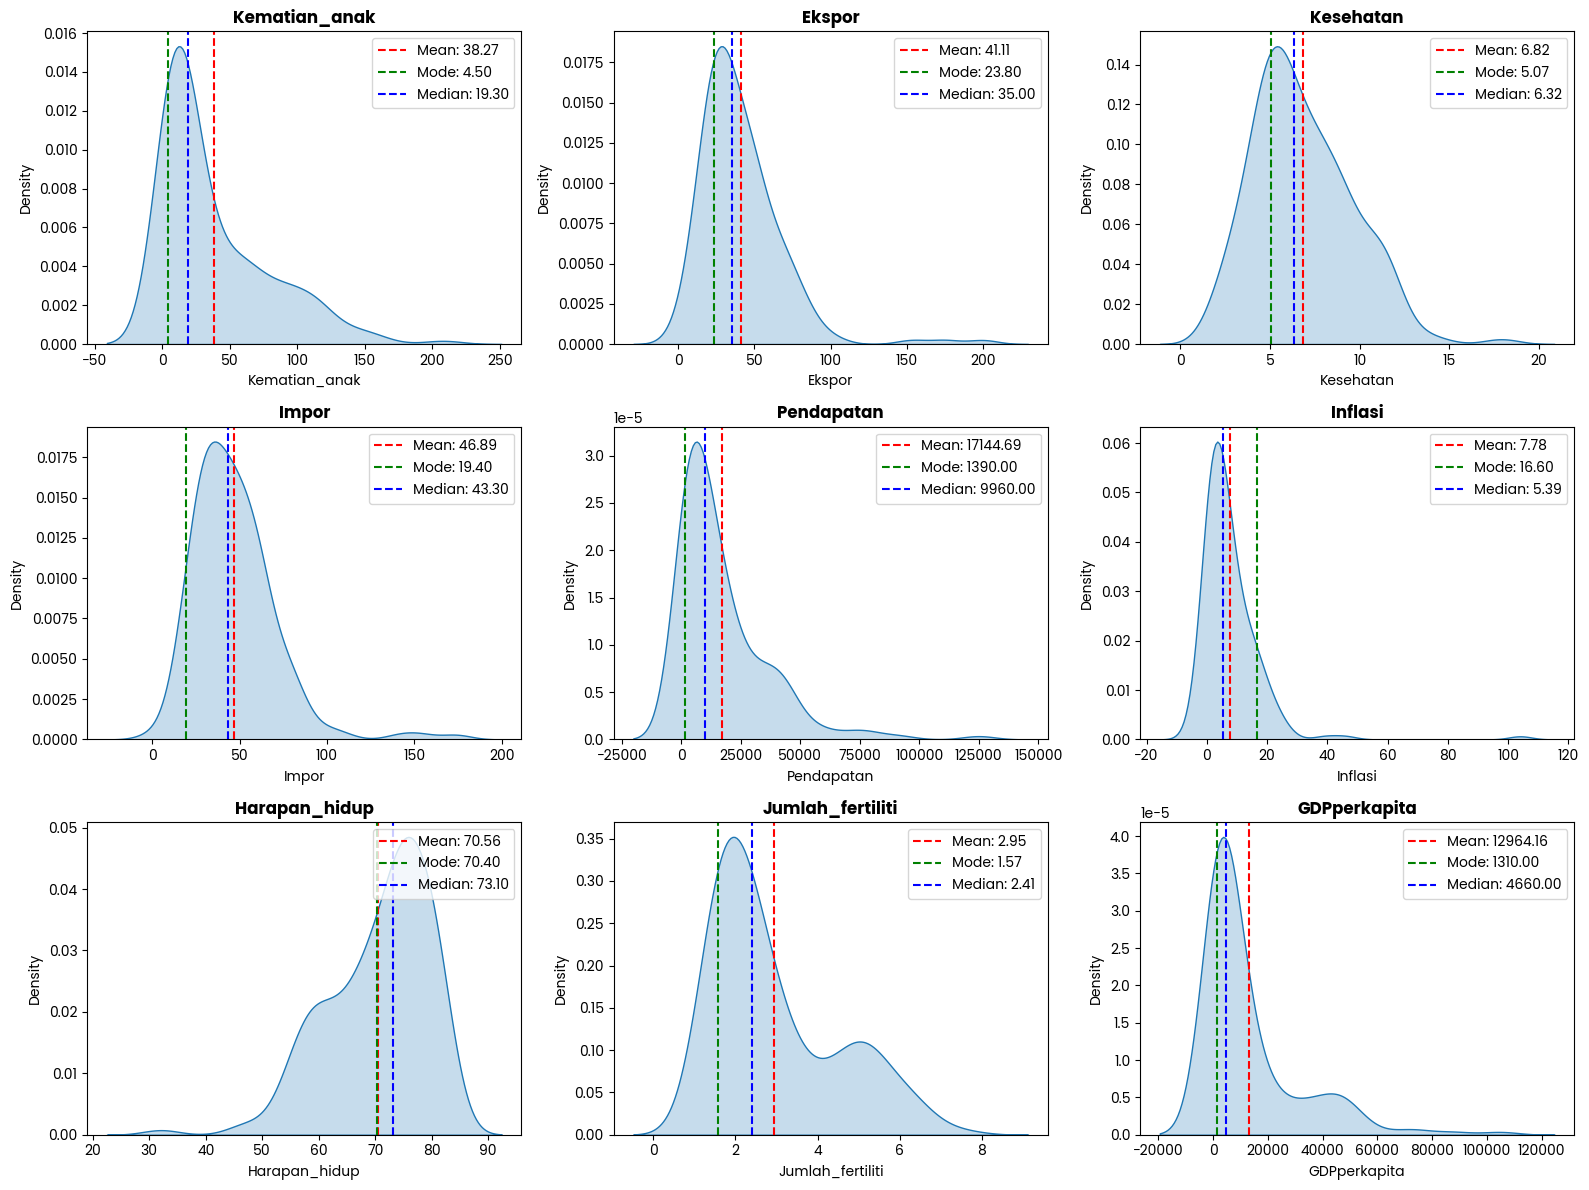

In [ ]:
'''
Visualisasi Distribusi Data Numerikal
'''

fig, axes = plt.subplots(3, 3, figsize=(16, 3 * 4))

for i, attr in enumerate(data_numerik.columns):
    row = i // 3
    col = i % 3
    sns.kdeplot(data=data_numerik[attr], ax=axes[row, col], fill=True)
    axes[row, col].set_title(attr, fontweight='bold')

    mean_val = data_numerik[attr].mean()
    mode_val = data_numerik[attr].mode().iloc[0]
    median_val = data_numerik[attr].median()

    axes[row, col].axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[row, col].axvline(mode_val, color='g', linestyle='--', label=f'Mode: {mode_val:.2f}')
    axes[row, col].axvline(median_val, color='b', linestyle='--', label=f'Median: {median_val:.2f}')

    axes[row, col].legend(loc='upper right')

plt.tight_layout()
plt.show()

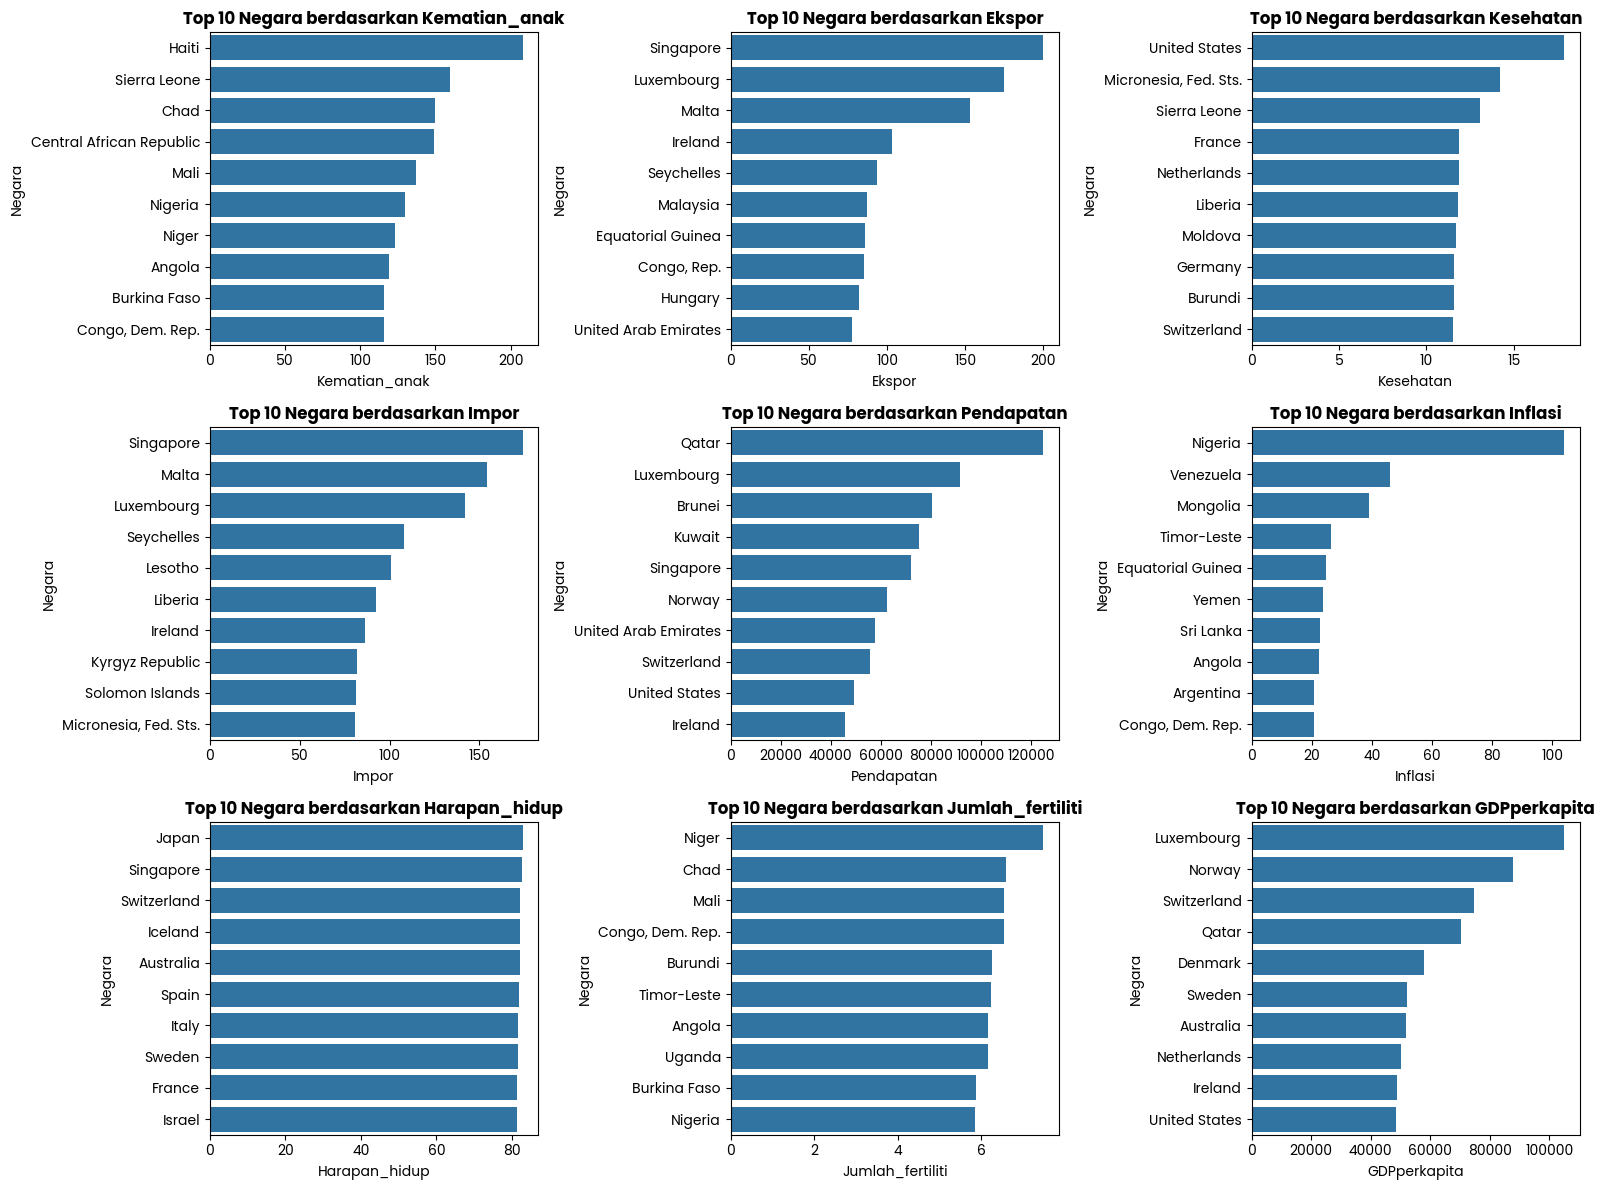

In [ ]:
'''
Visualisasi Distribusi Data Kategorikal
'''

fig, axes = plt.subplots(3, 3, figsize=(16, 3 * 4))

for i, col in enumerate(data_numerik):
    row = i // 3
    column = i % 3

    top10 = df.sort_values(by=col, ascending=False).head(10)

    sns.barplot(data=top10, y='Negara', x=col, ax=axes[row, column])

    axes[row, column].set_title(f'Top 10 Negara berdasarkan {col}', fontweight='bold')
    axes[row, column].set_xlabel(col)
    axes[row, column].set_ylabel('Negara')

plt.tight_layout()
plt.show()

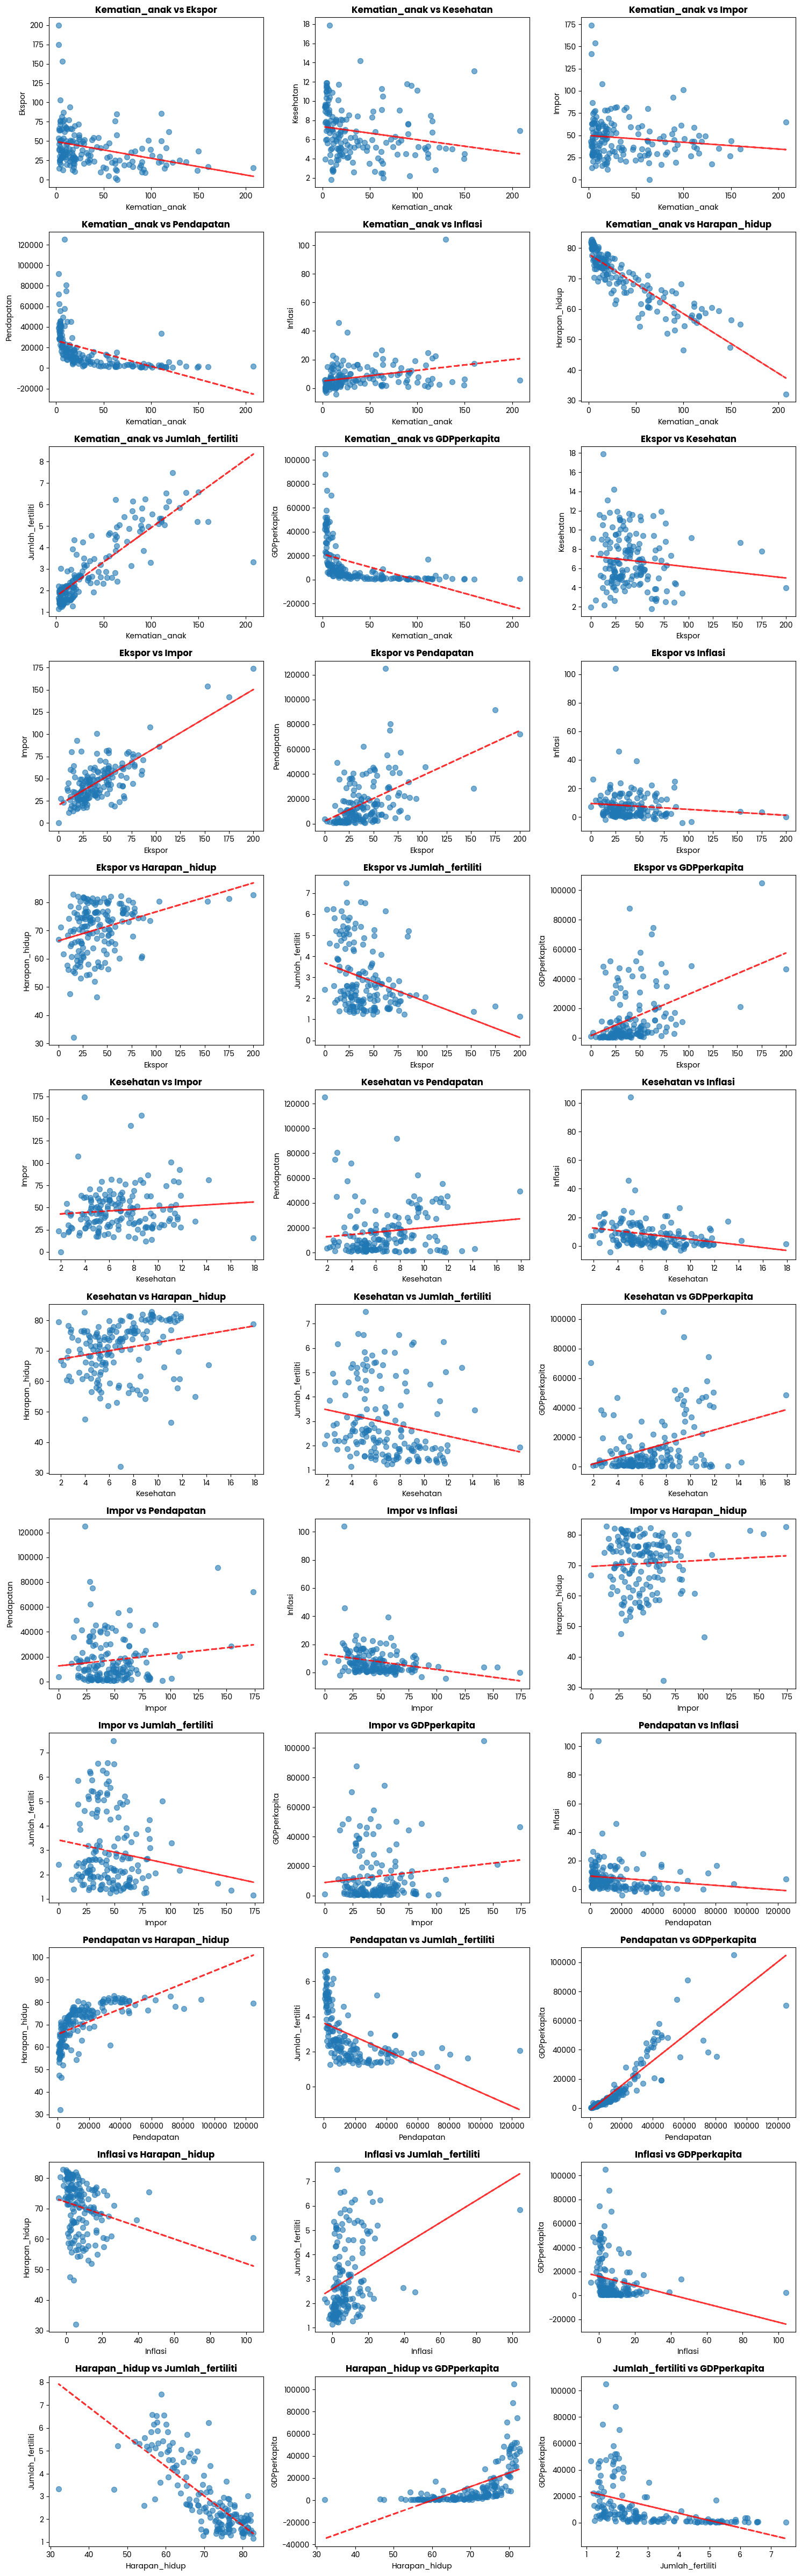

In [ ]:
'''
Scatterplot Matrix untuk Data Numerik
'''

pairs = list(itertools.combinations(data_numerik.columns, 2))

fig, axes = plt.subplots(12, 3, figsize=(5*3, 4*12))
axes = axes.flatten()

for i, (x_col, y_col) in enumerate(pairs):
    axes[i].scatter(data_numerik[x_col], data_numerik[y_col], alpha=0.6, s=50)
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    axes[i].set_title(f'{x_col} vs {y_col}', fontweight='bold')

    z = np.polyfit(data_numerik[x_col], data_numerik[y_col], 1)
    p = np.poly1d(z)
    axes[i].plot(data_numerik[x_col], p(data_numerik[x_col]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

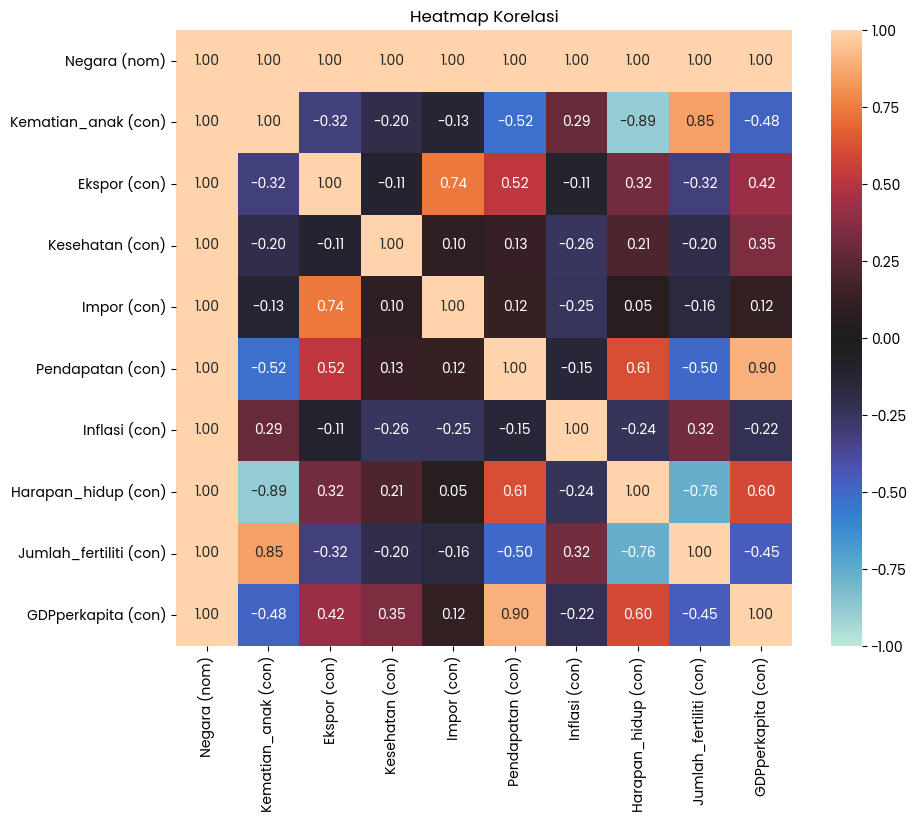

In [ ]:
# Menampilkan heatmap korelasi
assoc = associations(df, nominal_columns=['Negara'], figsize=(10, 8), mark_columns=True, title='Heatmap Korelasi')

**Kaitan Erat Antara Ekonomi dan Kesehatan**

Temuan paling signifikan adalah adanya hubungan yang kuat antara tingkat kemakmuran suatu negara dengan kualitas kesehatan penduduknya. Secara umum, negara dengan pendapatan per kapita (GDP) yang lebih tinggi menunjukkan hasil kesehatan yang jauh lebih baik. Hal ini terlihat dari dua indikator kunci: harapan hidup dan angka kematian anak. Negara yang lebih sejahtera penduduknya memiliki harapan hidup yang lebih panjang. Di negara yang sama, angka kematian anak cenderung sangat rendah.

Penyebabnya logisnya adalah kemampuan ekonomi yang lebih tinggi memungkinkan sebuah negara untuk berinvestasi lebih baik pada sektor-sektor krusial seperti layanan kesehatan yang berkualitas, sanitasi yang layak, akses air bersih, dan pemenuhan gizi warganya.

**Hubungan Antar Indikator Kesehatan**

Data juga menunjukkan bahwa angka kematian anak dan harapan hidup memiliki hubungan yang sangat erat dan berkebalikan. Artinya, jika suatu negara berhasil menekan angka kematian anak, maka hampir pasti angka harapan hidup penduduknya akan tinggi. Keduanya dapat dijadikan tolok ukur utama untuk menilai keberhasilan sistem kesehatan publik suatu negara.

## **Data Preparation**

In [ ]:
def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, \
                  df[col].dtype, \
                  df[col].isna().sum(), \
                  round(100*(df[col].isna().sum()/len(df)), 2), \
                  df[col].nunique(), \
                  df[col].unique()
                  ])

    return pd.DataFrame(columns=['kolom', 'dataType', 'null', 'nullPercentage', 'unique', 'values'], data=data)

In [ ]:
'''
Menyelaraskan Nama Kolom
'''

# Menampilkan nama kolom sebelum diselaraskan
print(f'Nama kolom sebelum diselaraskan:\n{df.columns}')

# Menselaraskan nama kolom
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Menampilkan nama kolom setelah diselaraskan
print(f'\nNama kolom setelah diselaraskan:\n{df.columns}')

Nama kolom sebelum diselaraskan:
Index(['Negara', 'Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'],
      dtype='object')

Nama kolom setelah diselaraskan:
Index(['negara', 'kematian_anak', 'ekspor', 'kesehatan', 'impor', 'pendapatan',
       'inflasi', 'harapan_hidup', 'jumlah_fertiliti', 'gdpperkapita'],
      dtype='object')


In [ ]:
'''
Membuat salinan data sebelum diolah
'''

df_ori = df.copy()

In [ ]:
'''
Data Numerikal
'''

data_numerik = df.select_dtypes(include=['int64', 'float64'])
data_numerik.head()

kolom_numerik = df.select_dtypes(include=np.number).columns

In [ ]:
'''
Menangani Data Null
'''

# Memeriksa data null
print(f'Jumlah data null: {df.isnull().sum().sum()}')

Jumlah data null: 0


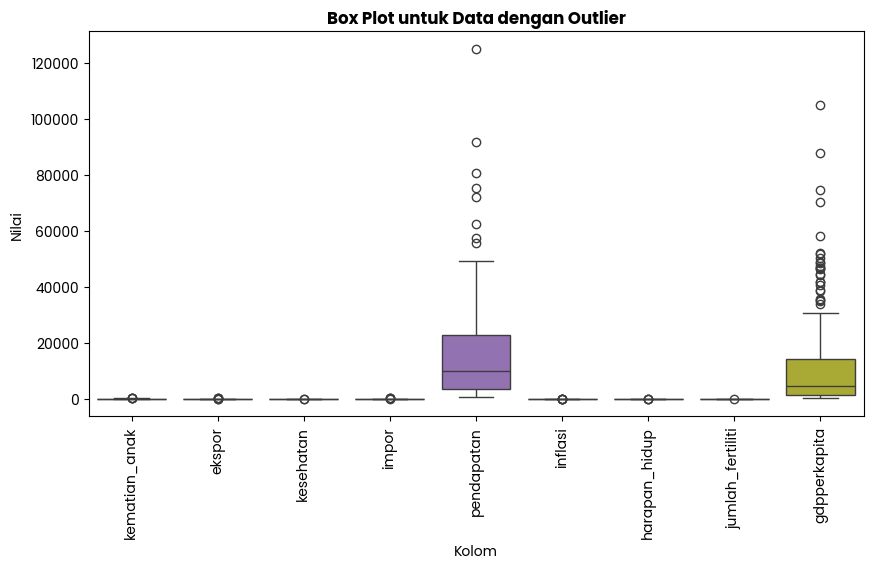

In [ ]:
'''
Memeriksa Keberadaan Outlier
'''

plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title('Box Plot untuk Data dengan Outlier', fontweight='bold')
plt.xlabel('Kolom')
plt.ylabel('Nilai')
plt.xticks(rotation=90)
plt.show()

In [ ]:
'''
Menerapkan Log Transformation
'''

for kolom in kolom_numerik:
    min_value = df[kolom].min()
    if min_value <= 0:
        offset = abs(min_value) + 1
    else:
        offset = 0

    df[kolom] = np.log(df[kolom] + offset)

In [ ]:
'''
Menangani Outlier dengan Capping
'''

print(f'Dimensi data sebelum outlier ditangani: {df.shape}')

Q1 = df[kolom_numerik].quantile(0.25)
Q3 = df[kolom_numerik].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

for kolom in kolom_numerik:
    df[kolom] = df[kolom].clip(lower=batas_bawah[kolom], upper=batas_atas[kolom])

print(f'Dimensi data setelah outlier ditangani: {df.shape}')

Dimensi data sebelum outlier ditangani: (167, 10)
Dimensi data setelah outlier ditangani: (167, 10)


In [ ]:
'''
Standarisasi
'''

kon_df = df[kolom_numerik]

mean_sebelum = kon_df.mean()
std_sebelum = kon_df.std()

scaler = StandardScaler()
df[kolom_numerik] = scaler.fit_transform(df[kolom_numerik])

print("Data setelah standarisasi:")
display(df[kolom_numerik].head())

Data setelah standarisasi:


,kematian_anak,ekspor,kesehatan,impor,pendapatan,inflasi,harapan_hidup,jumlah_fertiliti,gdpperkapita
0,1.257285,-2.062774,0.451708,0.146326,-1.413059,0.548563,-1.795246,1.667924,-1.460560
1,-0.206196,-0.343252,0.102775,0.311978,0.071749,-0.184814,0.672995,-0.962078,-0.122592
2,0.223939,0.184241,-0.976051,-0.601819,0.285304,1.215100,0.694128,0.207329,-0.064683
3,1.496866,0.992388,-1.885360,0.051004,-0.353135,1.675782,-1.253631,1.786385,-0.221051
4,-0.618844,0.467574,-0.094852,0.714088,0.605603,-0.856283,0.725723,-0.429314,0.608191


In [ ]:
print("\nMean values:\n", df[kolom_numerik].mean())
print("\nStandard deviation:\n", df[kolom_numerik].std())


Mean values:
 kematian_anak      -1.256480e-16
ekspor              1.010502e-15
kesehatan          -7.306198e-16
impor               1.276424e-16
pendapatan          5.637540e-16
inflasi             1.063687e-16
harapan_hidup      -3.637809e-15
jumlah_fertiliti   -2.340111e-16
gdpperkapita        3.563351e-16
dtype: float64

Standard deviation:
 kematian_anak       1.003008
ekspor              1.003008
kesehatan           1.003008
impor               1.003008
pendapatan          1.003008
inflasi             1.003008
harapan_hidup       1.003008
jumlah_fertiliti    1.003008
gdpperkapita        1.003008
dtype: float64


Standardisasi data berhasil dengan sangat baik, karena data sudah seimbang di mana karena nilai mean praktis 0 dan tersebar dengan baik di mana nilai std sangat dekat dengan 1.

## **Clustering**

#### **Mencari Nilai k Optimal**

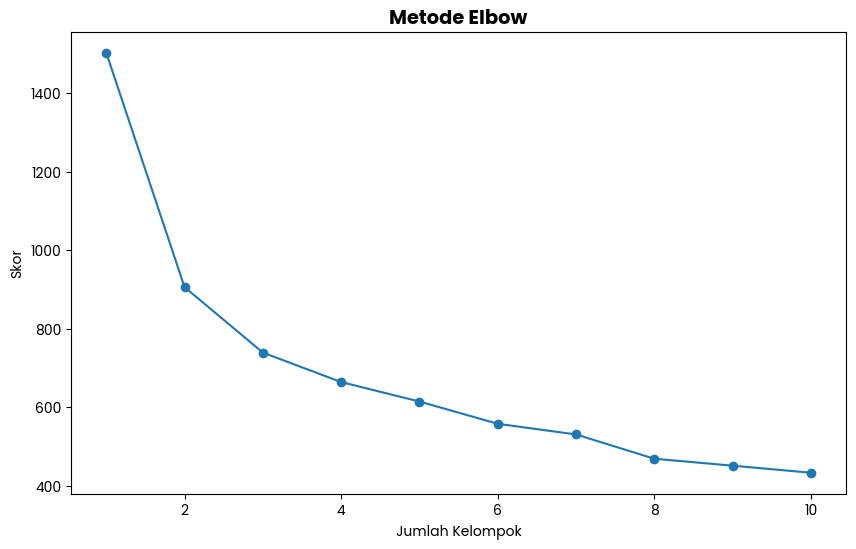

In [ ]:
'''
Elbow Method
'''

data_numerik = df[kolom_numerik]

skor_kelompok = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(data_numerik)
    skor_kelompok.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), skor_kelompok, marker='o')
plt.xlabel('Jumlah Kelompok')
plt.ylabel('Skor')
plt.title('Metode Elbow', fontweight='bold', fontsize=14)
plt.show()

In [ ]:
'''
Evaluasi Penurunan WCSS
'''

skor_kelompok = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(data_numerik)
    skor_kelompok.append(km.inertia_)

penurunan_wcss = [0]
for i in range(1, len(skor_kelompok)):
    penurunan = skor_kelompok[i-1] - skor_kelompok[i]
    penurunan_wcss.append(penurunan)

persentase_penurunan = [0]
for i in range(1, len(skor_kelompok)):
    penurunan_pct = (penurunan_wcss[i] / skor_kelompok[i-1]) * 100
    persentase_penurunan.append(penurunan_pct)

df_wcss = pd.DataFrame({
    'Jumlah_Kelompok': range(1, 11),
    'WCSS': skor_kelompok,
    'Penurunan_WCSS': penurunan_wcss,
    'Persentase_Penurunan': persentase_penurunan
})

display(df_wcss)

,Jumlah_Kelompok,WCSS,Penurunan_WCSS,Persentase_Penurunan
0,1,1503.000000,0.000000,0.000000
1,2,905.744559,597.255441,39.737554
2,3,738.860238,166.884321,18.425098
3,4,665.511907,73.348331,9.927227
4,5,604.389784,61.122123,9.184227
5,6,537.548753,66.841030,11.059259
6,7,515.135023,22.413731,4.169618
7,8,481.662186,33.472837,6.497876
8,9,437.470929,44.191257,9.174741
9,10,442.722254,-5.251325,-1.200383


Berdasarkan grafik elbow method, nilai k optimal adalah 2, karena kurva WCSS mengalami penurunan paling besar antara K = 1 dan K = 2. Setelah k = 2, penurunan WCSS menjadi lebih kecil dan lebih bertahap.

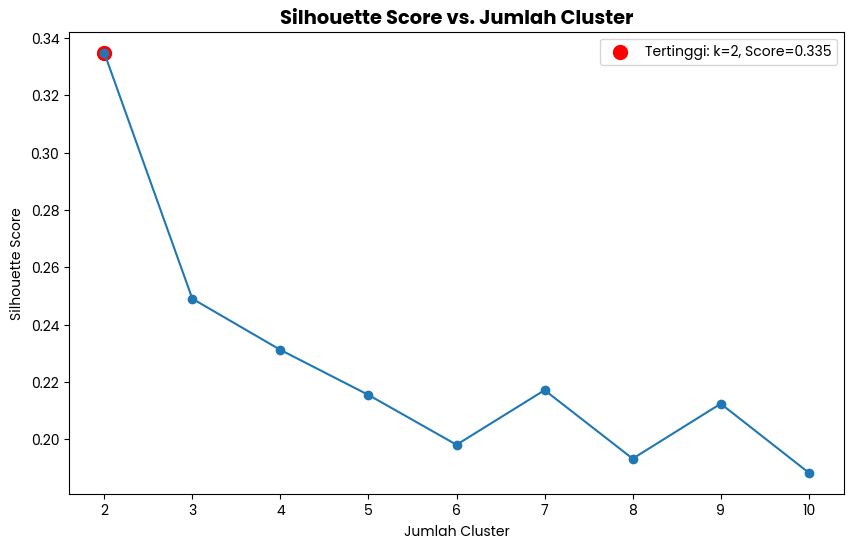

In [ ]:
'''
Silhouette Score
'''

n_clusters_range = range(2, 11)
silhouette_scores = []

for i in n_clusters_range:
    km = KMeans(n_clusters=i)
    labels = km.fit_predict(data_numerik)
    score = silhouette_score(data_numerik, labels)
    silhouette_scores.append(score)

best_n_clusters = n_clusters_range[silhouette_scores.index(max(silhouette_scores))]
best_score = max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Jumlah Cluster', fontweight='bold', fontsize=14)

plt.scatter(best_n_clusters, best_score, color='red', s=100, label=f'Tertinggi: k={best_n_clusters}, Score={best_score:.3f}')
plt.legend()
plt.show()

Berdasarkan grafik dan hasil pengukuran silhoutte score, nilai k optimal adalah 2, karena nilai silhouette score tertinggi adalah 0.2795 untuk k = 2 dan penurunan nilai silhouette score cukup signifikan

#### **Reduksi Dimensi**

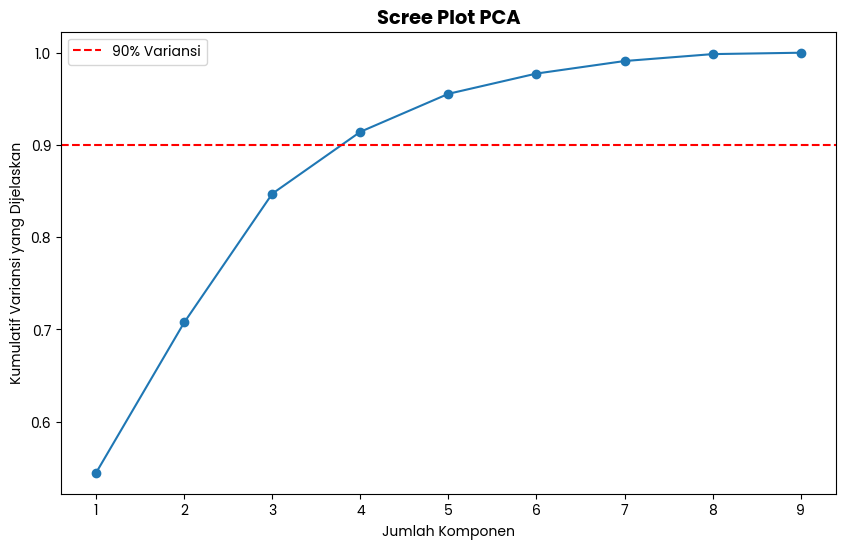

In [ ]:
'''
Variansi Kumulatif PCA
'''

pca = PCA()
pca.fit(data_numerik)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Variansi yang Dijelaskan')
plt.title('Scree Plot PCA', fontweight='bold', fontsize=14)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variansi')
plt.legend()
plt.show()

In [ ]:
'''
Reduksi Dimensi dengan PCA
'''

pca = PCA(n_components=4)
data_pca = pca.fit_transform(data_numerik)

#### **Clustering**

In [ ]:
'''
Clustering ke 2 Kelompok
'''

kmeans_pca = KMeans(n_clusters=2)
labels_pca = kmeans_pca.fit_predict(data_pca)

df['Cluster_PCA'] = labels_pca
df_ori['Cluster_PCA'] = labels_pca

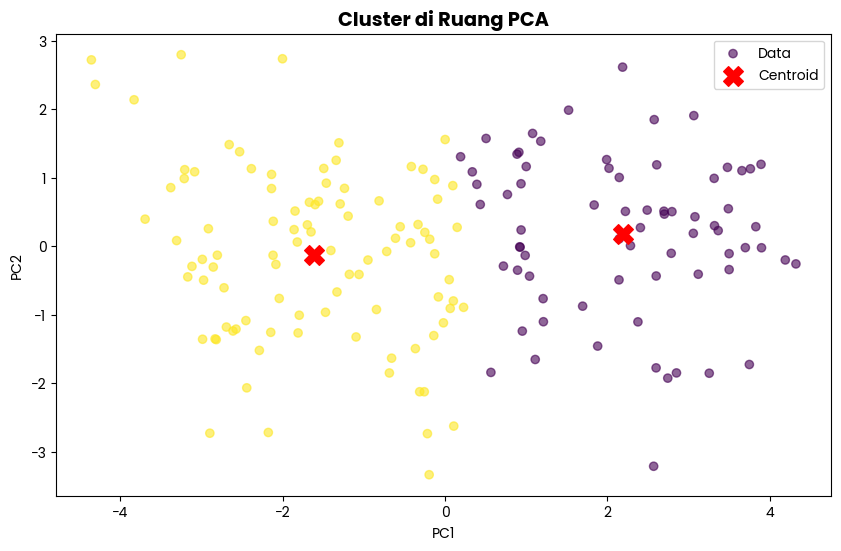

In [ ]:
'''
Visualisasi Cluster PCA dan Centroid-nya
'''

centroids = kmeans_pca.cluster_centers_

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:,0], data_pca[:,1], c=labels_pca, cmap='viridis', alpha=0.6, label='Data')

plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='X', s=200, label='Centroid')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster di Ruang PCA', fontweight='bold', fontsize=14)
plt.legend()
plt.show()

In [ ]:
'''
Centroid dan Kontribusi Fitur ke PCA
'''

print("Posisi Centroid dalam ruang PCA:")
print(centroids)

print("\nVariance Ratio dari komponen PCA:")
print(pca.explained_variance_ratio_)

print("\nKontribusi fitur asli terhadap komponen PCA:")
for i, component in enumerate(pca.components_):
    print(f"\nPrincipal Component {i+1}:")
    for j, value in enumerate(component):
        print(f"{kolom_numerik[j]}: {value:.3f}")

closest, distances = pairwise_distances_argmin_min(centroids, data_pca)
print("")
for i, idx in enumerate(closest):
    print(f"Cluster {i}: Negara terdekat dengan centroid adalah {df.iloc[idx]['negara']}")

Posisi Centroid dalam ruang PCA:
[[ 2.18977517  0.17357862 -0.01505335 -0.01481423]
 [-1.61952122 -0.12837585  0.01113321  0.01095636]]

Variance Ratio dari komponen PCA:
[0.54470338 0.16287802 0.1395863  0.06708984]

Kontribusi fitur asli terhadap komponen PCA:

Principal Component 1:
kematian_anak: 0.434
ekspor: -0.251
kesehatan: -0.139
impor: -0.092
pendapatan: -0.417
inflasi: 0.225
harapan_hidup: -0.402
jumlah_fertiliti: 0.398
gdpperkapita: -0.420

Principal Component 2:
kematian_anak: 0.076
ekspor: 0.486
kesehatan: 0.065
impor: 0.775
pendapatan: -0.155
inflasi: -0.264
harapan_hidup: -0.187
jumlah_fertiliti: 0.076
gdpperkapita: -0.140

Principal Component 3:
kematian_anak: -0.069
ekspor: -0.443
kesehatan: 0.718
impor: -0.002
pendapatan: -0.210
inflasi: -0.480
harapan_hidup: -0.029
jumlah_fertiliti: -0.027
gdpperkapita: -0.090

Principal Component 4:
kematian_anak: -0.019
ekspor: 0.181
kesehatan: 0.632
impor: 0.092
pendapatan: 0.073
inflasi: 0.731
harapan_hidup: -0.066
jumlah_fertil

**Profil Klaster**  
- **Cluster 0 (Tajikistan sebagai representasi)**: Cenderung memiliki karakteristik pembangunan rendah, dengan nilai tinggi pada kematian anak dan fertilitas, serta rendah pada pendapatan dan harapan hidup.  
- **Cluster 1 (Romania sebagai representasi)**: Lebih terkait dengan integrasi ekonomi internasional (tinggi impor-ekspor), serta kondisi demografi yang lebih stabil.

## **Analisis Hasil**

In [ ]:
'''
Interpretasi Cluster
'''

# Cek statistik ringkas per cluster dengan nilai asli
display(df_ori.groupby('Cluster_PCA')[kolom_numerik].mean().round(2))

# Buat statistik ringkas per cluster dengan nilai terstandarisasi
cluster_summary = df.groupby('Cluster_PCA')[kolom_numerik].mean().round(2)

,kematian_anak,ekspor,kesehatan,impor,pendapatan,inflasi,harapan_hidup,jumlah_fertiliti,gdpperkapita
Cluster_PCA,,,,,,,,,
0,11.73,48.87,7.41,48.98,26597.60,5.33,76.68,1.93,21058.85
1,74.16,30.61,6.02,44.07,4363.28,11.09,62.28,4.33,2019.21


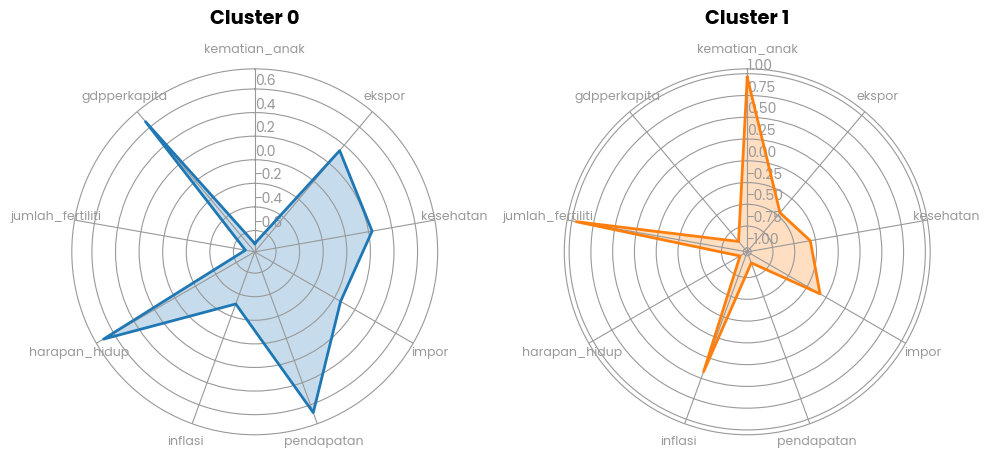

In [ ]:
'''
Visualisasi Radar Perbandingan Cluster
'''

labels = cluster_summary.columns.tolist()
num_vars = len(labels)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, axes = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(10, 5))
colors = plt.cm.tab10.colors

for i, cluster in enumerate(cluster_summary.index):
    values = cluster_summary.loc[cluster].tolist()
    values += values[:1]

    ax = axes[i]
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)
    ax.set_title(f'Cluster {cluster}', y=1.1, fontsize=14, fontweight='bold')

    color = colors[i % len(colors)]
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=color, label=cluster)
    ax.fill(angles, values, color=color, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, size=9, color='#999999')

    ax.tick_params(colors='#999999')
    ax.spines['polar'].set_color('#999999')
    ax.yaxis.grid(color='#999999')
    ax.xaxis.grid(color='#999999')

plt.tight_layout()
plt.show()

In [ ]:
'''
5 Negara yang Paling Membutuhkan Bantuan
'''

cluster_1_countries = df_ori[df_ori['Cluster_PCA'] == 1]
sorted_countries = cluster_1_countries.sort_values(by=['kematian_anak', 'gdpperkapita', 'harapan_hidup', 'jumlah_fertiliti', 'pendapatan'],
                                                   ascending=[False, True, True, True, False])
top_countries = sorted_countries.head(5)

print("Negara-negara yang paling membutuhkan bantuan:")
display(top_countries[['negara', 'kematian_anak', 'harapan_hidup', 'jumlah_fertiliti', 'pendapatan', 'gdpperkapita']])

Negara-negara yang paling membutuhkan bantuan:


,negara,kematian_anak,harapan_hidup,jumlah_fertiliti,pendapatan,gdpperkapita
66,Haiti,208.0,32.1,3.33,1500,662
132,Sierra Leone,160.0,55.0,5.20,1220,399
32,Chad,150.0,56.5,6.59,1930,897
31,Central African Republic,149.0,47.5,5.21,888,446
97,Mali,137.0,59.5,6.55,1870,708


#### **Kesimpulan**

Berdasarkan analisis  di atas, CEO HELP International dapat memprioritaskan negara-negara berikut untuk diberikan bantuan: Haiti, Sierra Leone, Chad, Central African Republic, dan Mali.